In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

qutip.settings.has_mkl = False  # Fix the OS erros in VSCode

In [2]:
from sync_gates import unitary_circuit

In [3]:
dt = 0.1

detuning = 0.3
signal_strength = 0.2

N = 200

phi = gamma = -detuning * dt / 2
theta = -signal_strength * dt

In [4]:
phi

-0.015

In [5]:
iq_state = (
    3 * np.exp(1j * 1) * basis(2, 0) 
    + np.exp(1j * -np.pi) * basis(2, 1)
).unit()

iq_state = basis(2, 0)

## Continuous

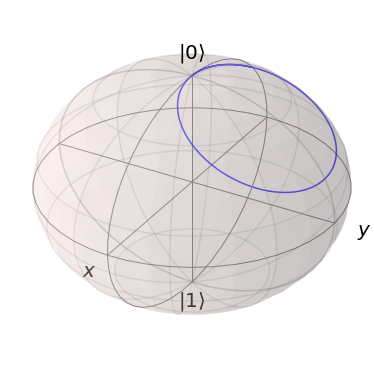

In [6]:
H = detuning * sigmaz() + signal_strength * sigmay()
# H = detuning * sigmaz() + signal_strength * sigmay()

t_list = np.arange(0, N*dt, dt)

cont_result = mesolve(-H/2, iq_state,t_list, e_ops=[sigmax(), sigmay(), sigmaz()])

b = Bloch()

b.add_points(cont_result.expect, meth='l')

b.show()



## Discrete

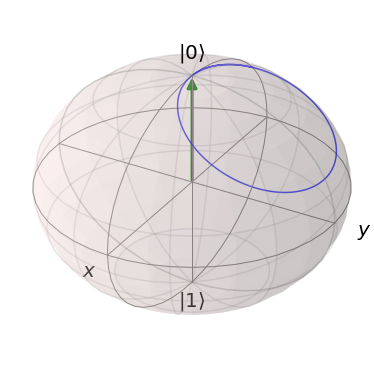

In [7]:
from sync_gates import run_simu

qc = unitary_circuit(detuning, signal_strength, dt)

# Compatibility with full case
initial_state = tensor(iq_state, basis(2, 0))

b = Bloch()
b.add_states(iq_state)

# Calculate bloch vector components so the states can all be plotted the same colour
ps = np.array([expect([sigmax(), sigmay(), sigmaz()], state.ptrace(0)) for state in run_simu(qc, N, initial_state)])

b.add_points([ps[:, 0], ps[:, 1], ps[:, 2]], meth="l")

b.show()


## Combined Result

In [10]:
b = Bloch3d()

b.add_states(iq_state)

b.add_points([a[::10] for a in cont_result.expect])

b.add_points([ps[::5, 0], ps[::5, 1], ps[::5, 2]])

b.show()
